1本目のスパイラル（真の軌道）: [(0.0, 0.0), (0.09950041652780259, 0.009983341664682815), (0.19601331556824833, 0.03973386615901225), (0.2866009467376818, 0.0886560619984019), (0.3684243976011541, 0.15576733692346023), (0.4387912809451864, 0.2397127693021015), (0.495201368945807, 0.33878548403702136), (0.5353895310991419, 0.45095238106638386), (0.5573653674777324, 0.5738848727196183), (0.559448971443598, 0.7049942186647351), (0.5403023058681398, 0.8414709848078965), (0.4989557335681351, 0.9803280960675791), (0.43482930537200815, 1.1184469031606719), (0.34774847721196356, 1.2526256410423509), (0.23795400006033715, 1.3796296219838444), (0.10610580250155435, 1.4962424799060816), (-0.046719235682062106, 1.5993177648664083), (-0.21903564030239228, 1.6858301777691966), (-0.40896377044755683, 1.7529257355807513), (-0.6142501770406569, 1.7979701666060877), (-0.8322936730942848, 1.8185948536513634), (-1.060176819659701, 1.8127396699626348), (-1.294702457961761, 1.7786920884030983), (-1.5324348489435964, 1.715

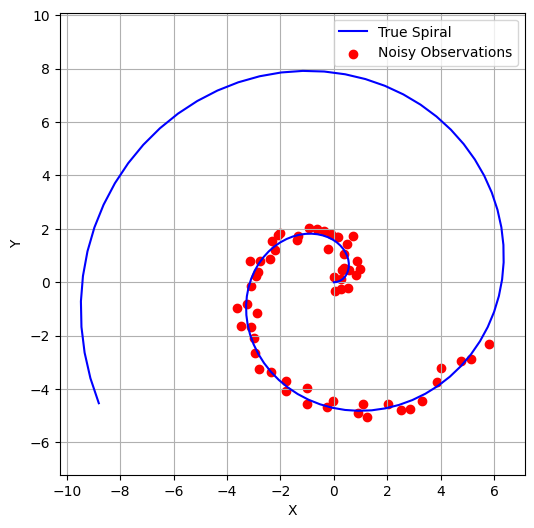

In [24]:


import math #数学関数(sin,cosなど)
import random #乱数


# ## スパイラルの構築
# - スパイラルの式（極座標）： r=a+bΘ
# - rは半径,Θは角度

#ライブラリ無しで「0~6π」をn個に分けたい
def linspace(start,stop,num):
    if num==1:
        return [start]
    step=(stop-start)/(num-1)
    return[start+i*step for i in range(num)]


linspace(0,6,5)

#スパイラルの座標を計算する
def generate_spiral_points (ntotal,a,b):
    points=[] #座標を入れる箱
    for i in range(ntotal):
        theta = i * 0.1  # θを少しずつ大きくする（0.1ラジアン刻み）
        r=a+b*theta
        x=r*math.cos(theta)
        y=r*math.sin(theta)
        points.append((x,y)) # 「~.append」でリストの末尾に要素を追加。ここではpointsリストの末尾に要素を加えていく    
    return(points)



# ノイズを加える関数を作る
# 正規分布ノイズをライブラリ無しで作るにはBox-Muller法を使う
def gaussian_noise(std):
    u1=random.random() # ランダム関数発動。「random.random()」で、0.0以上1.0未満の浮動小数点数の乱数を生成
    u2=random.random()
    z=math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
    return z*std


# ランダムな一部をサンプルしてノイズを加える
def sample_with_noise(points,nsample,noise_std):
    if nsample > len(points):
        raise ValueError(f"nsample（{nsample}）はデータ数（{len(points)}）以下にしてください。")
    #start_index=random.randint(0,len(points)-nsample) # random.randint(a,b)で、a<=n<=bの範囲のランダムな整数を返す
    start_index = 0  #ノイズデータの始点を(0,0)からに固定
    sampled=[] # ノイズを加えたデータを入れる箱
    for i in range(start_index,start_index+nsample):
        x,y=points[i] #pointsリストのi番目の要素の座標をx,yにそれぞれ代入
        x +=gaussian_noise(noise_std) #関数gaussian_noise発動
        y +=gaussian_noise(noise_std)
        sampled.append((x,y))
    return sampled


# 全部まとめて関数化する
def generate_spiral_data(nspiral=1,ntotal=100,nsample=60,a=0,b=1,noise_std=0.25): 
    # 「nspiral」はスパイラルの本数,「ntotal」は正解スパイラルのデータ点の数,「nsample」はノイズ付きデータのデータ点の数
    #「a,b」はスパイラル生成で使う変数,「noise_std」はノイズ付きデータを作るときに使うばらつきの強度。値が大きくなるとばらつきも大きい
    
    
    if nsample > ntotal:
        raise ValueError(f"nsample({nsample}) は ntotal({ntotal}) 以下にしてください。")

    all_true=[] # 教師データ
    all_obs=[] # 観測データ（Observation）
    for _ in range(nspiral): # 「for _ in range(ooo)」は「for i in range(ooo)」のように書いてもOKです。 変数名が「_」になっているだけです。
        is_ccw = random.random()>0.5  #50％の確率で時計回りor反時計回り。is_ccw（is counter-clockwise）は、ランダムに True（反時計）か False（時計）を選びます。
        sign = 1 if is_ccw else -1 # 条件式が真のときに評価される式 if 条件式 else 条件式が偽のときに評価される式。
        spiral=generate_spiral_points(ntotal,a,b*sign) #関数generate_spiral_points発動
        obs=sample_with_noise(spiral,nsample,noise_std) #関数sample_with_noise発動
        all_true.append(spiral)
        all_obs.append(obs)
    return all_true,all_obs


true_paths, noisy_samples = generate_spiral_data()
print("1本目のスパイラル（真の軌道）:", true_paths[0])
print("1本目の観測データ（ノイズあり）:", noisy_samples[0])


import matplotlib.pyplot as plt


# 描画する前にデータを整理
def data_cleaning(true_paths,noisy_samples):
    for i in range(len(true_paths)):
        true=true_paths[i]
        noisy=noisy_samples[i]

        true_x=[p[0] for p in true] #リスト内包表記。trueの中のすべての点pから、x座標（p[0]）だけを取り出してリストにする
        true_y=[p[1] for p in true] #「for p in true」はtrueというリストの中から要素をpに取り出す

        noisy_x=[p[0] for p in noisy]
        noisy_y=[p[1] for p in noisy]
    return true_x,true_y,noisy_x,noisy_y
        
true_x,true_y,noisy_x,noisy_y=data_cleaning(true_paths, noisy_samples) #data_cleaning関数発動して各変数に代入
plt.figure(figsize=(6,6)) #「plt.figure」で新しい図（キャンバス）を作る。figsize=(o,o)でサイズ指定(単位はインチ)
plt.plot(true_x,true_y,label='True Spiral',color='blue')
plt.scatter(noisy_x,noisy_y,label='Noisy Observations',color='red') #「plt.scatter(x, y, label="○○")」で散布図を描く関数

plt.xlabel('X')
plt.ylabel('Y')
plt.legend() #上で指定した、label="○○"で付けた名前を表示してくれる
plt.axis('equal') #スケールを同じにする
plt.grid(True) #グリッド線を引くか
plt.show() #これを言わんと出力されん













Step 0, Loss 5.4617
Step 100, Loss 0.1696
Step 200, Loss 0.0673
Step 300, Loss 0.0573
Step 400, Loss 0.0545
Step 500, Loss 0.0527
Step 600, Loss 0.0513
Step 700, Loss 0.0508
Step 800, Loss 0.0505
Step 900, Loss 0.0514


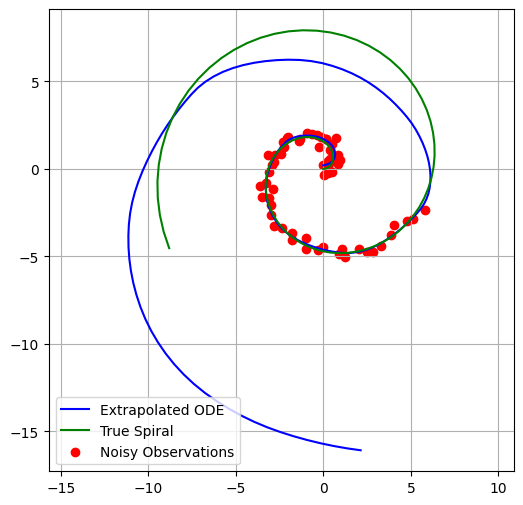

Step 0, Loss 6.3672
Step 100, Loss 0.1980
Step 200, Loss 0.0757
Step 300, Loss 0.0591
Step 400, Loss 0.0528
Step 500, Loss 0.0508
Step 600, Loss 0.0488
Step 700, Loss 0.0481
Step 800, Loss 0.0487
Step 900, Loss 0.0508


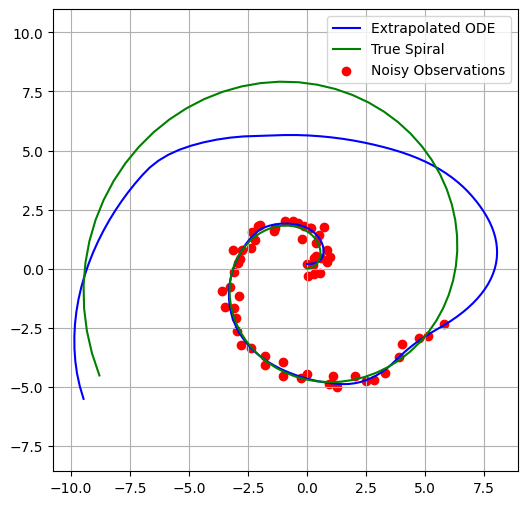

Step 0, Loss 6.5835
Step 100, Loss 0.3253
Step 200, Loss 0.0791
Step 300, Loss 0.0595
Step 400, Loss 0.0531
Step 500, Loss 0.0515
Step 600, Loss 0.0507
Step 700, Loss 0.0500
Step 800, Loss 0.0495
Step 900, Loss 0.0503


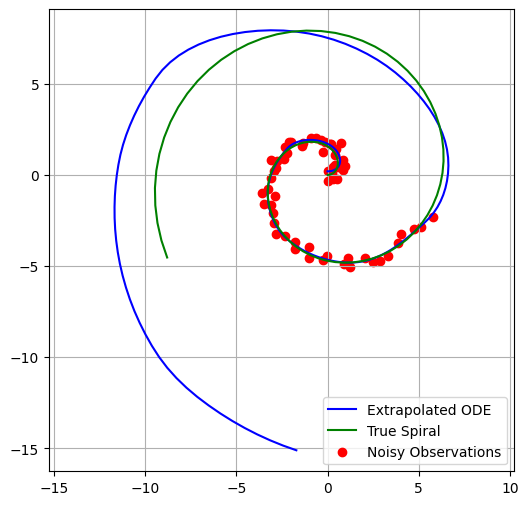

Step 0, Loss 5.6281
Step 100, Loss 0.3682
Step 200, Loss 0.0718
Step 300, Loss 0.0579
Step 400, Loss 0.0529
Step 500, Loss 0.0513
Step 600, Loss 0.0500
Step 700, Loss 0.0493
Step 800, Loss 0.0496
Step 900, Loss 0.0483


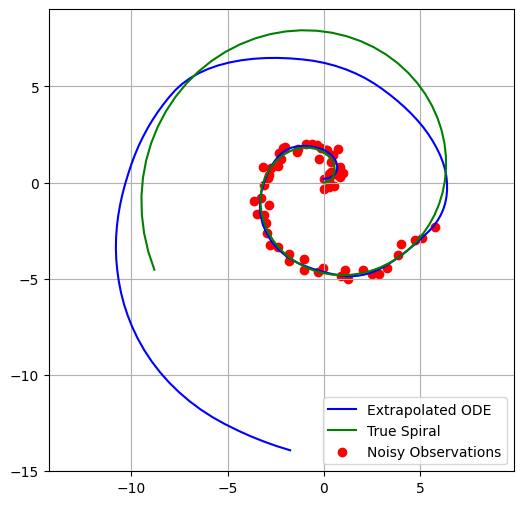

Step 0, Loss 7.0372
Step 100, Loss 0.3334
Step 200, Loss 0.0925
Step 300, Loss 0.0752
Step 400, Loss 0.0641
Step 500, Loss 0.0560
Step 600, Loss 0.0514
Step 700, Loss 0.0504
Step 800, Loss 0.0484
Step 900, Loss 0.0511


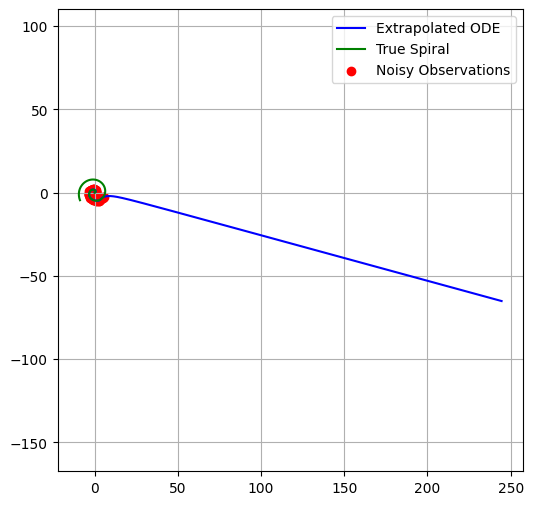

Step 0, Loss 9.0559
Step 100, Loss 0.2939
Step 200, Loss 0.1130
Step 300, Loss 0.0855
Step 400, Loss 0.0721
Step 500, Loss 0.0599
Step 600, Loss 0.0542
Step 700, Loss 0.0516
Step 800, Loss 0.0504
Step 900, Loss 0.0497


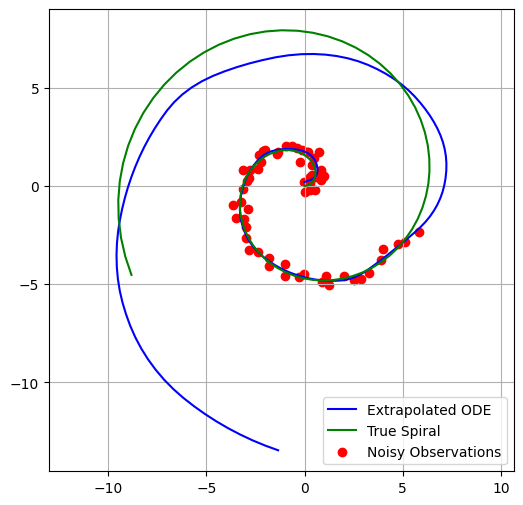

Step 0, Loss 9.7467
Step 100, Loss 0.5020
Step 200, Loss 0.1482
Step 300, Loss 0.0897
Step 400, Loss 0.0719
Step 500, Loss 0.0602
Step 600, Loss 0.0547
Step 700, Loss 0.0521
Step 800, Loss 0.0507
Step 900, Loss 0.0499


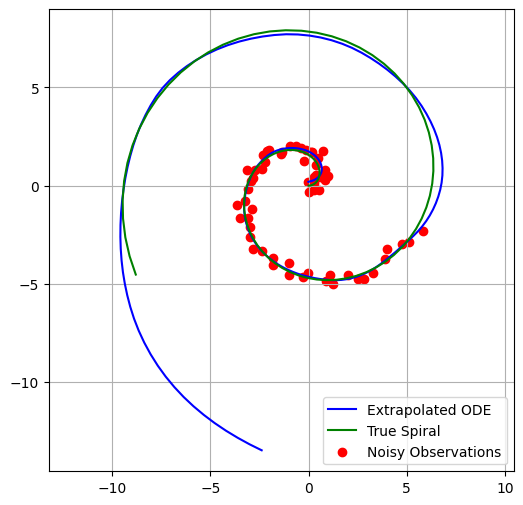

Step 0, Loss 6.3998
Step 100, Loss 0.1260
Step 200, Loss 0.0683
Step 300, Loss 0.0581
Step 400, Loss 0.0534
Step 500, Loss 0.0517
Step 600, Loss 0.0508
Step 700, Loss 0.0502
Step 800, Loss 0.0498
Step 900, Loss 0.0494


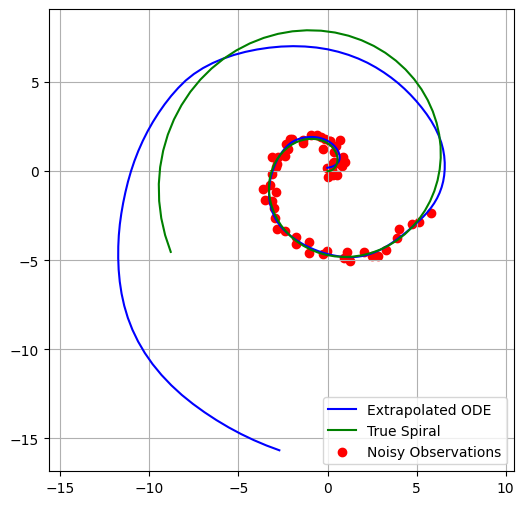

Step 0, Loss 7.2603
Step 100, Loss 0.9348
Step 200, Loss 0.2115
Step 300, Loss 0.0770
Step 400, Loss 0.0648
Step 500, Loss 0.0630
Step 600, Loss 0.0571
Step 700, Loss 0.0555
Step 800, Loss 0.0543
Step 900, Loss 0.0535


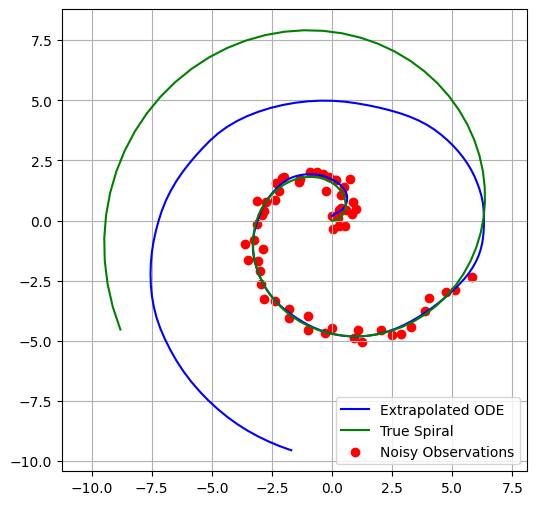

Step 0, Loss 5.4146
Step 100, Loss 0.1080
Step 200, Loss 0.0657
Step 300, Loss 0.0566
Step 400, Loss 0.0530
Step 500, Loss 0.0541
Step 600, Loss 0.0503
Step 700, Loss 0.0496
Step 800, Loss 0.0491
Step 900, Loss 0.0488


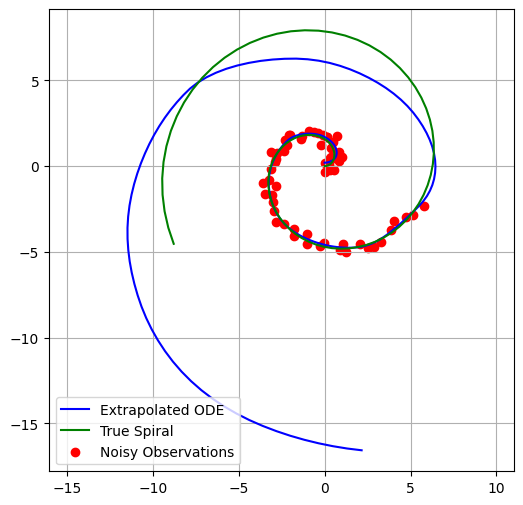

Step 0, Loss 5.2547
Step 100, Loss 0.1004
Step 200, Loss 0.0661
Step 300, Loss 0.0556
Step 400, Loss 0.0520
Step 500, Loss 0.0508
Step 600, Loss 0.0509
Step 700, Loss 0.0495
Step 800, Loss 0.0492
Step 900, Loss 0.0489


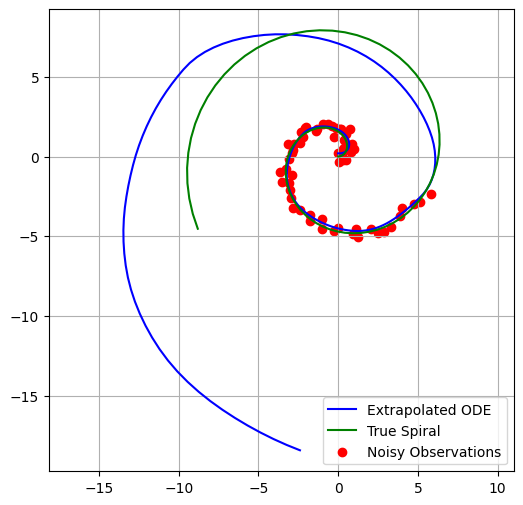

Step 0, Loss 6.1191
Step 100, Loss 0.2443
Step 200, Loss 0.0838
Step 300, Loss 0.0612
Step 400, Loss 0.0544
Step 500, Loss 0.0514
Step 600, Loss 0.0499
Step 700, Loss 0.0488
Step 800, Loss 0.0481
Step 900, Loss 0.0476


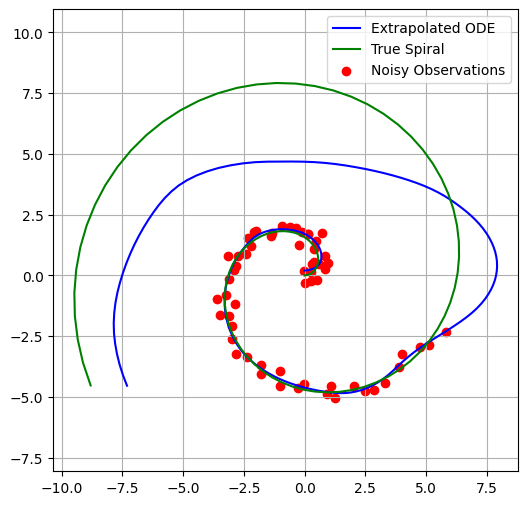

Step 0, Loss 7.3692
Step 100, Loss 0.1929
Step 200, Loss 0.0898
Step 300, Loss 0.0680
Step 400, Loss 0.0596
Step 500, Loss 0.0558
Step 600, Loss 0.0541
Step 700, Loss 0.0527
Step 800, Loss 0.0549
Step 900, Loss 0.0511


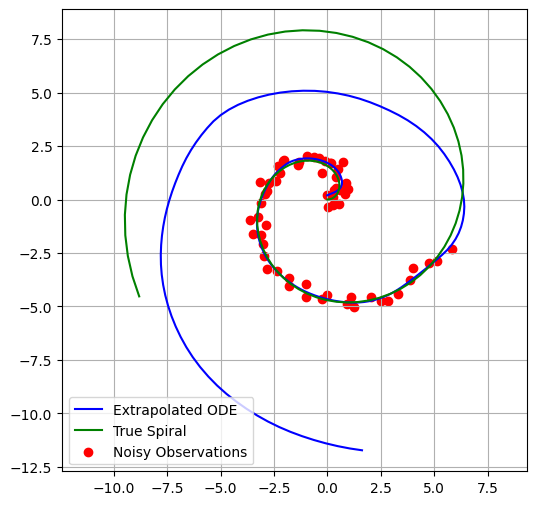

Step 0, Loss 6.8497
Step 100, Loss 0.1798
Step 200, Loss 0.0762
Step 300, Loss 0.0620
Step 400, Loss 0.0538
Step 500, Loss 0.0517
Step 600, Loss 0.0515
Step 700, Loss 0.0499
Step 800, Loss 0.0508
Step 900, Loss 0.0487


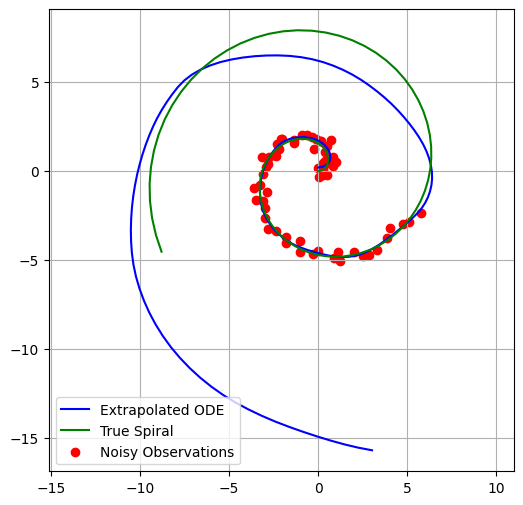

Step 0, Loss 5.1240
Step 100, Loss 0.0848
Step 200, Loss 0.0571
Step 300, Loss 0.0518
Step 400, Loss 0.0504
Step 500, Loss 0.0498
Step 600, Loss 0.0524
Step 700, Loss 0.0563
Step 800, Loss 0.0489
Step 900, Loss 0.0483


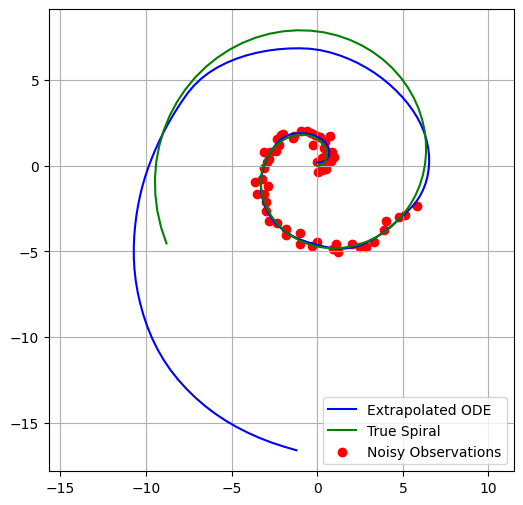

Step 0, Loss 5.5244
Step 100, Loss 0.0809
Step 200, Loss 0.0550
Step 300, Loss 0.0519
Step 400, Loss 0.0504
Step 500, Loss 0.0518
Step 600, Loss 0.0496
Step 700, Loss 0.0492
Step 800, Loss 0.0520
Step 900, Loss 0.0487


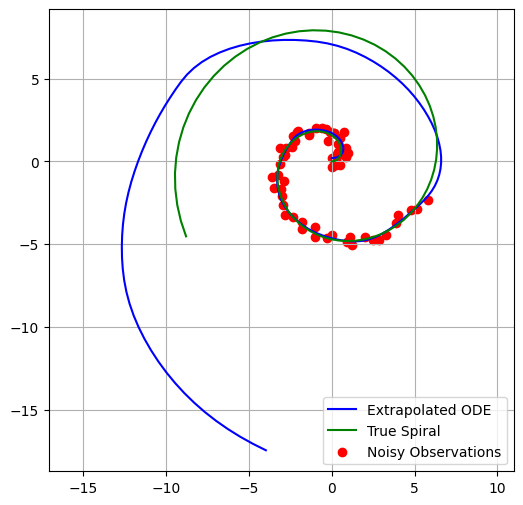

Step 0, Loss 9.2642
Step 100, Loss 0.2821
Step 200, Loss 0.1082
Step 300, Loss 0.0895
Step 400, Loss 0.0749
Step 500, Loss 0.0655
Step 600, Loss 0.0594
Step 700, Loss 0.0560
Step 800, Loss 0.0539
Step 900, Loss 0.0526


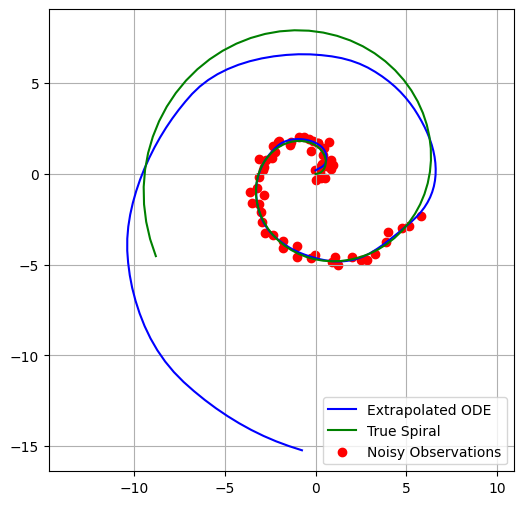

Step 0, Loss 7.8559
Step 100, Loss 0.1542
Step 200, Loss 0.0865
Step 300, Loss 0.0625
Step 400, Loss 0.0547
Step 500, Loss 0.0523
Step 600, Loss 0.0513
Step 700, Loss 0.0521
Step 800, Loss 0.0501
Step 900, Loss 0.0497


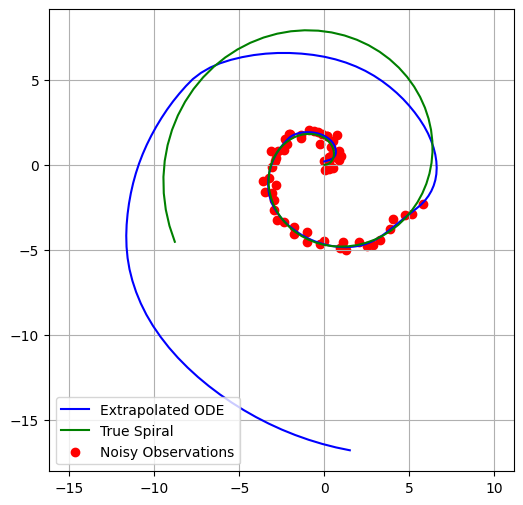

Step 0, Loss 9.4398
Step 100, Loss 0.2059
Step 200, Loss 0.0749
Step 300, Loss 0.0589
Step 400, Loss 0.0533
Step 500, Loss 0.0517
Step 600, Loss 0.0508
Step 700, Loss 0.0503
Step 800, Loss 0.0498
Step 900, Loss 0.0495


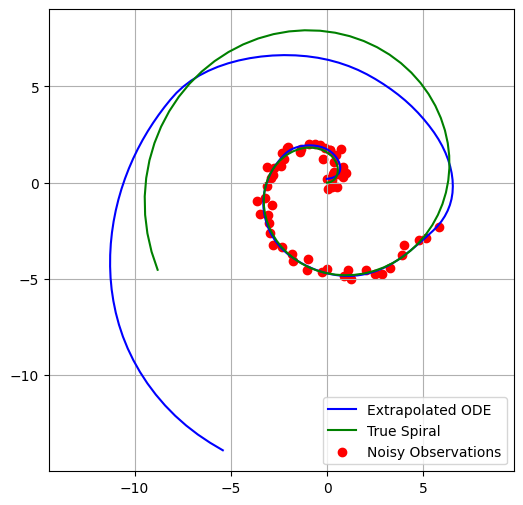

Step 0, Loss 7.7161
Step 100, Loss 0.4808
Step 200, Loss 0.0995
Step 300, Loss 0.0825
Step 400, Loss 0.0628
Step 500, Loss 0.0533
Step 600, Loss 0.0500
Step 700, Loss 0.0484
Step 800, Loss 0.0476
Step 900, Loss 0.0477


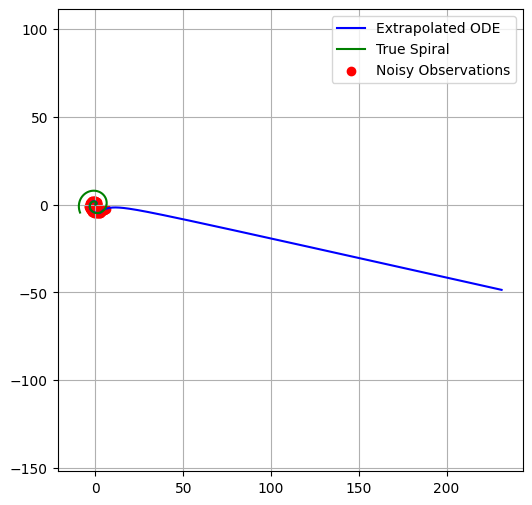

Step 0, Loss 6.0927
Step 100, Loss 0.1797
Step 200, Loss 0.0943
Step 300, Loss 0.0645
Step 400, Loss 0.0553
Step 500, Loss 0.0538
Step 600, Loss 0.0511
Step 700, Loss 0.0501
Step 800, Loss 0.0496
Step 900, Loss 0.0494


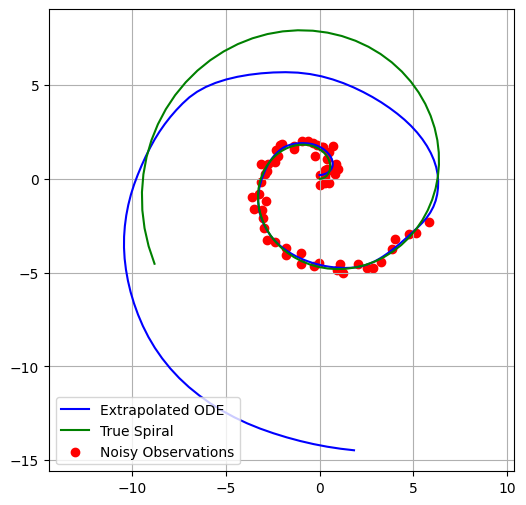

Step 0, Loss 5.4967
Step 100, Loss 0.2089
Step 200, Loss 0.0819
Step 300, Loss 0.0636
Step 400, Loss 0.0542
Step 500, Loss 0.0506
Step 600, Loss 0.0491
Step 700, Loss 0.0484
Step 800, Loss 0.0474
Step 900, Loss 0.0468


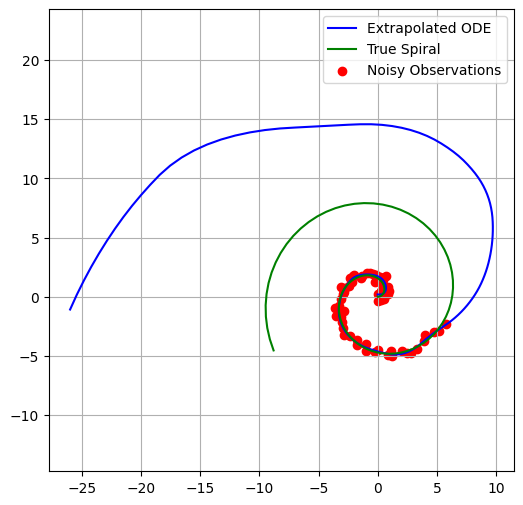

Step 0, Loss 8.5342
Step 100, Loss 0.3811
Step 200, Loss 0.1112
Step 300, Loss 0.0775
Step 400, Loss 0.0653
Step 500, Loss 0.0584
Step 600, Loss 0.0546
Step 700, Loss 0.0528
Step 800, Loss 0.0518
Step 900, Loss 0.0511


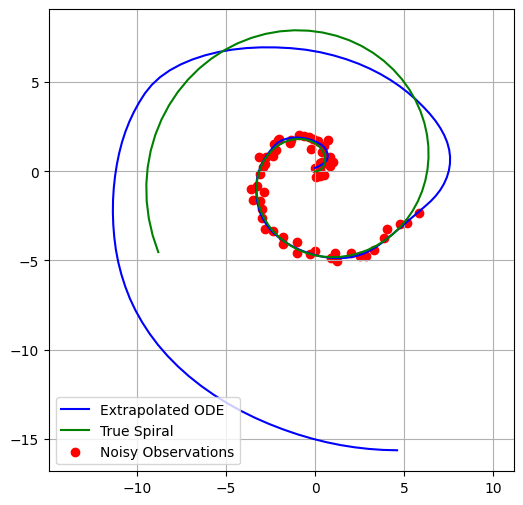

Step 0, Loss 9.8567
Step 100, Loss 0.3520
Step 200, Loss 0.1815
Step 300, Loss 0.1195
Step 400, Loss 0.0978
Step 500, Loss 0.0844
Step 600, Loss 0.0732
Step 700, Loss 0.0646
Step 800, Loss 0.0589
Step 900, Loss 0.0554


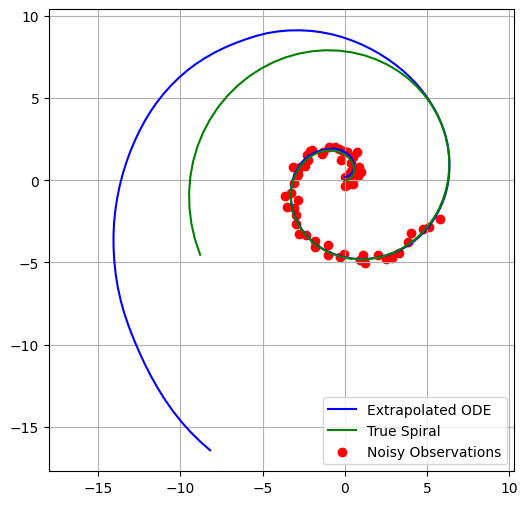

Step 0, Loss 6.9486
Step 100, Loss 0.3296
Step 200, Loss 0.1344
Step 300, Loss 0.0988
Step 400, Loss 0.0845
Step 500, Loss 0.0741
Step 600, Loss 0.0664
Step 700, Loss 0.0580
Step 800, Loss 0.0540
Step 900, Loss 0.0517


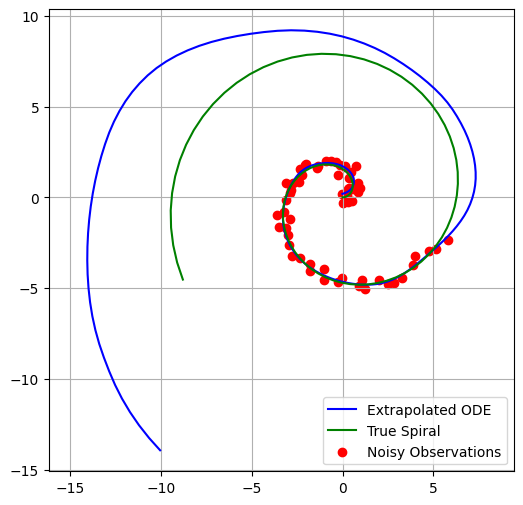

Step 0, Loss 5.5301
Step 100, Loss 0.1670
Step 200, Loss 0.0791
Step 300, Loss 0.0590
Step 400, Loss 0.0531
Step 500, Loss 0.0519
Step 600, Loss 0.0512
Step 700, Loss 0.0506
Step 800, Loss 0.0501
Step 900, Loss 0.0500


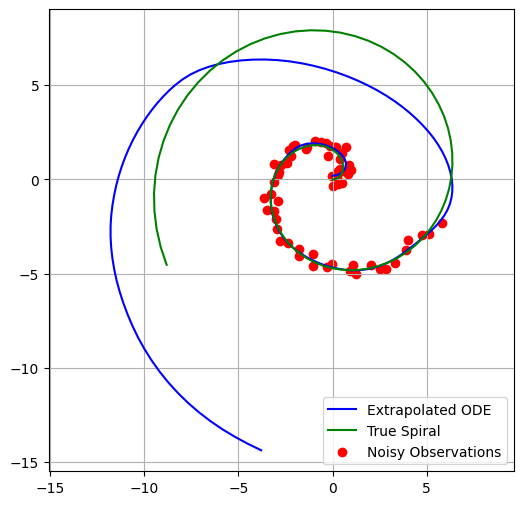

Step 0, Loss 5.6697
Step 100, Loss 0.1747
Step 200, Loss 0.0635
Step 300, Loss 0.0552
Step 400, Loss 0.0526
Step 500, Loss 0.0516
Step 600, Loss 0.0510
Step 700, Loss 0.0505
Step 800, Loss 0.0574
Step 900, Loss 0.0496


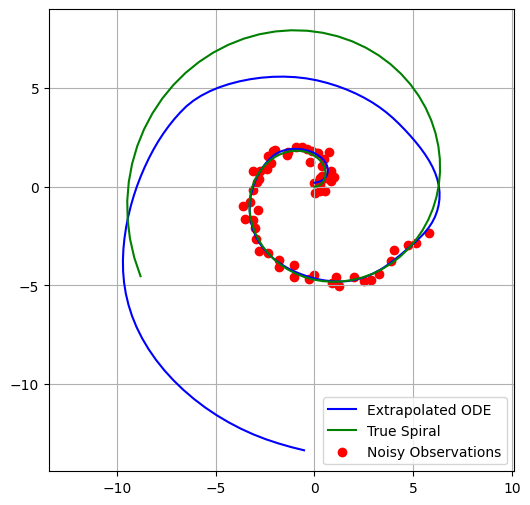

Step 0, Loss 6.9248
Step 100, Loss 0.1463
Step 200, Loss 0.0913
Step 300, Loss 0.0769
Step 400, Loss 0.0654
Step 500, Loss 0.0572
Step 600, Loss 0.0532
Step 700, Loss 0.0513
Step 800, Loss 0.0506
Step 900, Loss 0.0505


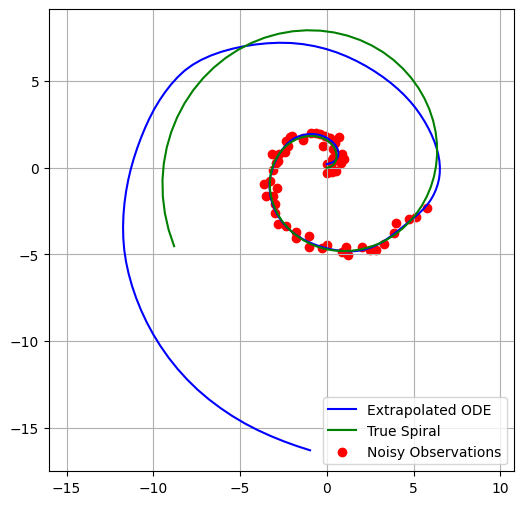

Step 0, Loss 8.7454
Step 100, Loss 0.2037
Step 200, Loss 0.1000
Step 300, Loss 0.0797
Step 400, Loss 0.0685
Step 500, Loss 0.0612
Step 600, Loss 0.0565
Step 700, Loss 0.0535
Step 800, Loss 0.0517
Step 900, Loss 0.0521


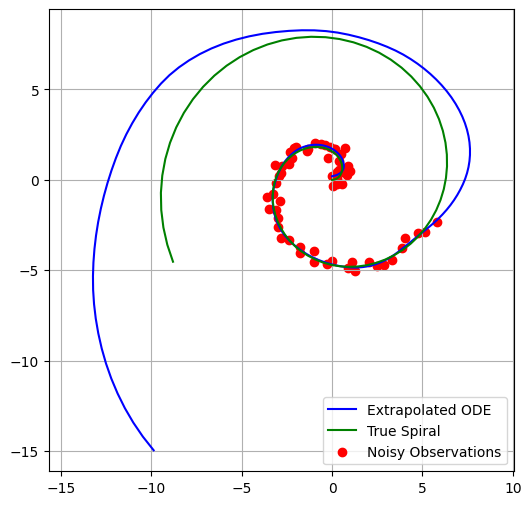

Step 0, Loss 5.7394
Step 100, Loss 0.2812
Step 200, Loss 0.0748
Step 300, Loss 0.0593
Step 400, Loss 0.0563
Step 500, Loss 0.0521
Step 600, Loss 0.0512
Step 700, Loss 0.0509
Step 800, Loss 0.0503
Step 900, Loss 0.0501


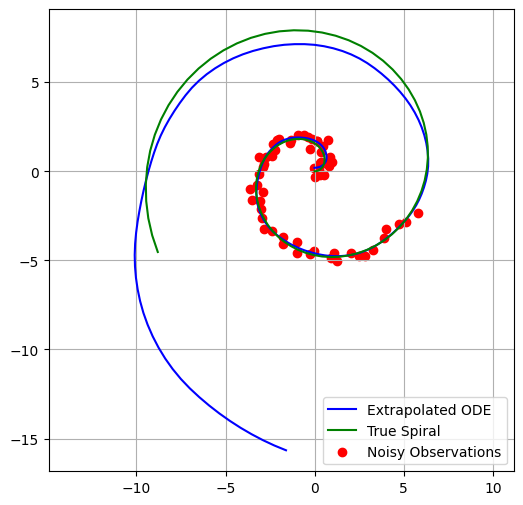

In [25]:
import torch
import pandas as pd


all_result=[]# すべての外挿結果を格納するリスト
n=30 #外挿を何セットやりたいか
for j in range(n):
    # 観測データの整形
    # 時間の配列。stepsは観測点数。つまりノイズデータの数

    #回帰実験用↓
    # t=torch.linspace(0,6,steps=60) #torch.linspace(開始,終了,oo分割)でtensorの配列を作る

    # 外挿用↓
    # t_train = torch.linspace(0, 6, steps=120)←この行は無視
    t_train =torch.linspace(0,6,steps=60)  # 60ステップに修正

    #回帰用
    #データ整形（バッチ×時刻×次元数）
    # x=torch.tensor(noisy_samples[0],dtype=torch.float32) # 1つ目のスパイラル観測点
    # x=x.unsqueeze(0) #

    # 外挿用
    x_train = torch.tensor(noisy_samples[0], dtype=torch.float32).unsqueeze(0)




    import torch.nn as nn

    # dy/dt = f(y, t) の f をNNで定義
    class ODEFunc(nn.Module):
        def __init__(self):
            super().__init__()
            self.net = nn.Sequential(
                nn.Linear(2, 50),
                nn.ReLU(),
                # nn.Tanh(),
                nn.Linear(50, 2),
            )

        def forward(self, t, y):
            return self.net(y)



    from torchdiffeq import odeint

    # ODEFuncをインスタンス化
    func = ODEFunc()


    # 初期状態(回帰用)（時刻t=0での位置）を決める
    # y0 = x[:, 0, :]  # shape: (1, 2)

    # 初期状態(外挿用)（時刻t=0での位置）を決める
    y0 = x_train[:, 0] # [:,x]スライス構文。「:」はすべての要素を取るの意味。xは何列目かを表す。つまりこの場合、x_trainのリストの内、0列目をすべて取るの意味
    # 最初の時刻の観測点（形状は [1, 2]）


    # ODEを解いて系列を得る（tに沿って解く）回帰用↓
    # pred_y = odeint(func, y0, t)  # shape: (30, 1, 2)
    # pred_y = pred_y.permute(1, 0, 2)  # shape: (1, 30, 2)




    optimizer = torch.optim.Adam(func.parameters(), lr=0.01)
    loss_fn = nn.MSELoss()

    """
    #回帰用
    for itr in range(1000):
        optimizer.zero_grad()
        pred_y = odeint(func, y0, t).permute(1, 0, 2)
        loss = loss_fn(pred_y, x)
        loss.backward()
        optimizer.step()


        if itr % 100 == 0:
            print(f"Step {itr}, Loss {loss.item():.4f}")
        
    pred_x = pred_y[0].detach().numpy()    
    """

    # 外挿用
    for itr in range(1000):
        optimizer.zero_grad()
        pred_y = odeint(func, y0, t_train) #[60, 1, 2]
        pred_y = pred_y.permute(1, 0, 2) #[1, 60, 2]
        loss = loss_fn(pred_y, x_train)
        loss.backward()
        optimizer.step()
        
        if itr % 100 == 0:
            print(f"Step {itr}, Loss {loss.item():.4f}")
    t_extrapolate = torch.linspace(0, 10, steps=200)  # 外挿の時間範囲
    pred_y_extrapolated = odeint(func, y0, t_extrapolate).squeeze(1).detach().numpy() # 外挿予測した結果を格納

    # print(j+1,"回目外挿予測結果データ:",pred_y_extrapolated)
    df = pd.DataFrame(pred_y_extrapolated,columns=["x","y"])
    df["試行回数"]=j+1# 何回目の繰り返しかを記録
    all_result.append(df)



    plt.figure(figsize=(6, 6))

    #回帰用↓
    # plt.plot(pred_x[:, 0], pred_x[:, 1], label="Fitted ODE", color='blue')

    # 外挿用↓
    plt.plot(pred_y_extrapolated[:, 0], pred_y_extrapolated[:, 1], label="Extrapolated ODE", color='blue')

    plt.plot(true_x,true_y,label='True Spiral',color='green')
    plt.scatter(noisy_x,noisy_y,label='Noisy Observations',color='red') #「plt.scatter(x, y, label="○○")」で散布図を描く関数
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()



# n回の外挿のデータセットを1つのDataFrameにまとめる（外挿の平均実験用に追加）
all_result_df = pd.concat(all_result, ignore_index=True)# 新しいindexを0から順に振り直す（重複なし）

# CSVファイルに保存（外挿の平均実験用に追加）
all_result_df.to_csv("pred_y_extrapolated_all.csv", index=False, encoding="utf-8")# 「index=False にするのは、余分なインデックス列を省くため」

# 各回の平均を取って一つの結果を出す



[[np.float64(-0.0069089790000000035), np.float64(0.19553249999999994)], [np.float64(0.0334054684), np.float64(0.20324898200000002)], [np.float64(0.0754234846), np.float64(0.21177044233333334)], [np.float64(0.11917541083333333), np.float64(0.22129208400000003)], [np.float64(0.16455670166666667), np.float64(0.2322097766666666)], [np.float64(0.21120499666666664), np.float64(0.24507212066666667)], [np.float64(0.25865222666666665), np.float64(0.2602358223333333)], [np.float64(0.3063807916666667), np.float64(0.27811838299999997)], [np.float64(0.35367667133333336), np.float64(0.299116097)], [np.float64(0.39973338933333336), np.float64(0.32364390033333323)], [np.float64(0.444062451), np.float64(0.35201202)], [np.float64(0.4860492839999999), np.float64(0.38437632566666674)], [np.float64(0.5251823066666668), np.float64(0.4208401493333332)], [np.float64(0.5608714803333332), np.float64(0.46148905200000007)], [np.float64(0.592550767), np.float64(0.5062770423333334)], [np.float64(0.6196017623333334)

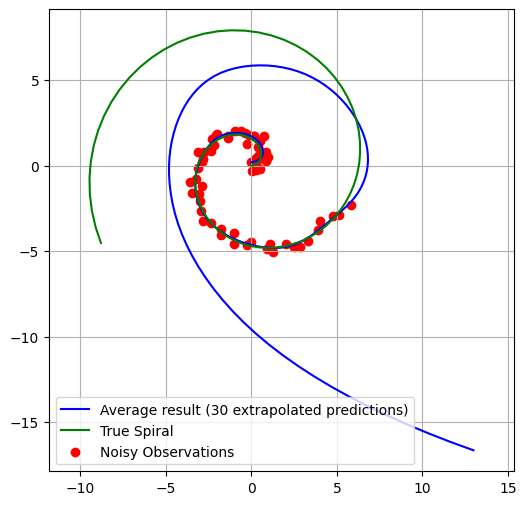

In [26]:
import numpy as np

df = pd.read_csv("pred_y_extrapolated_all.csv")# csv読み込み
x_array=df["x"].values # pred_y_extrapolated_all.csvのうちxの要素をnumpy配列として格納。これで配列と同じような計算ができる  
y_array=df["y"].values

all_ave=[]# すべての平均結果を入れるリスト
for j in range(0,200,1):
    x_sum=0
    y_sum=0
    for k in range (j,j+((n-1)*200)+1,200):
        x_sum+=x_array[k]
        y_sum+=y_array[k]

    x_ave=x_sum/n
    y_ave=y_sum/n
    all_ave.append([x_ave,y_ave])
print(all_ave)# all_aveの中身は[[np.float64(-0.0010858196), np.float64(0.271589)]]のようになるが、普通の配列と同じように要素を取り出したり、計算したりできるので問題ない

all_ave = np.array(all_ave)  # ← リストをNumPy配列に変換。これをすることで下のプロットのスライスを用いた書き方ができる。逆にこれがないと「リストのまま NumPy 的なインデックス指定」することになりエラーになる
plt.figure(figsize=(6, 6))
plt.plot(all_ave[:, 0], all_ave[:, 1], label="Average result (30 extrapolated predictions)", color='blue')# 各回の平均を取ったスパイラル予測
plt.plot(true_x,true_y,label='True Spiral',color='green')
plt.scatter(noisy_x,noisy_y,label='Noisy Observations',color='red') #「plt.scatter(x, y, label="○○")」で散布図を描く関数
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()




In [27]:
print (all_ave[0][0])

-0.0069089790000000035
